# The Travelling Salesman Problem

Given a set of cities and the distances between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?

In this project we will develop **Local Search** solution for the problem.

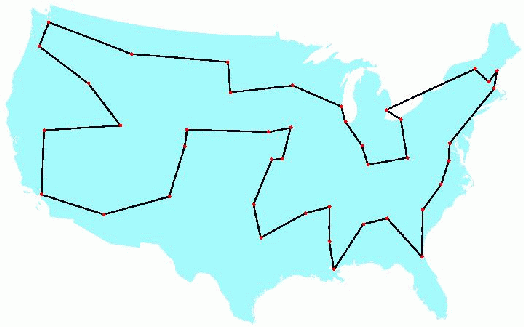


# The objective of the project is to implement :

---

**1) Nearest Neighbour Algorithm**

**2) 2-OPT Algorithm**

**3) 2-OPT Algorithm with DLB**

**4) 2-OPT Algorithm with Pruning (p-nearest neighbours)**

**5) 2-OPT Algorithm with Pruning (fixed radius)**

**6) 3-OPT Algorithm**

---



# Import libraries :
first we import some libraries that we will be using later on:

In [ ]:
import math
import time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

# Definition Of Classes :
Create class City to represent cities salesman needs to visit

In [ ]:
class City:
    def __init__(self, id, x, y):
        self.id = id
        self.x = x
        self.y = y
    def printCity (self):
        print (self.id, self.x, self.y)

# Importing Data :
This block of code is used to read cities from file and add to a list of instances of class 'City'

In [ ]:
inputfilename = "lu980.tsp.txt"
cities = []
G=nx.Graph()
with open(inputfilename, "r") as file_input:
    for line in file_input:
        str_city = line.split()
        cities.append(City(int(str_city[0]),float(str_city[1]), float(str_city[2])))
        G.add_node(int((str_city[0])), pos=((float(str_city[1])),(float(str_city[2]))))
City_Number = []
for i in range(len(cities)):
    City_Number.append(cities[i].id)

for val in cities:
    val.printCity()

# Plot all the nodes:

In [ ]:
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos,with_labels = True)
print("plotting...")
plt.show()

# Definition Of Functions :


This function we'll be used to calculate **distance between city1 and city2**.

In [ ]:
def getDistance(city1, city2):
    distance = (math.sqrt(pow(((city1.x) - (city2.x)), 2) + pow(((city1.y) -(city2.y)), 2)))
    return distance

This function we'll be used to calculate **total distances** from list of cities.

In [ ]:
def getTotalDistance(path):
    totalDistance = 0
    # loop through all the cities to get the distance
    for i in range(0, len(path) - 1):
        totalDistance += getDistance(path[i], path[i + 1])
    # add the distance between last city and the starting city
    totalDistance += getDistance(path[len(path) - 1], path[0])
    return totalDistance

This function we'll be used to **plot** the Tour.

In [ ]:
def plotTour(path):
    x = []; y = []
    for i in range(len(path)):
        x.append(path[i].x)
        y.append(path[i].y)
    x.append(path[0].x)
    y.append(path[0].y)
    plt.figure(figsize=(14,9))
    plt.plot(x,y,'ko-')
    for i in range(len(path)):
        plt.plot(x[i],y[i],'bo')
    plt.plot(x[0],y[0],'rs')
    plt.grid()    
    plt.show()

---

**Nearest Neighbour Algorithm Function :**

This function we'll be used to find a viable initial solution.

In [ ]:
def getPathFromNearestCity(availableCities):
    print("running...")
    global startingTime_NN
    startingTime_NN = time.time()
    # We need to make a copy of list availableCities in order that the function can't change it 
    TemporaryCities = availableCities.copy()
    path = []
    currentCity = TemporaryCities.pop()
    path.append(currentCity)
    # loop through available city list until it's empty
    while (TemporaryCities):
        # set minDistance to infinite number
        minDistance = float("inf") #It acts as an unbounded upper value for comparison
        # loop through available city list to find the nearest city
        for i in TemporaryCities:
            # calculate the distance between cities
            newDistance = getDistance(currentCity, i)
            if newDistance < minDistance:
                minDistance = newDistance
                nextCity = i 
        # after finding the nearest city, set the current city to nextCity
        currentCity = nextCity
        path.append(currentCity)
        TemporaryCities.remove(currentCity)
    return path

---

**2-OPT Algorithm Functions :**

This function we'll be used to reorder (**Swap**) the path by 2-opt.

In [ ]:
def twoOptSwap(route, i, j):
    new_route = route[0:i]
    new_route.extend(reversed(route[i:j + 1]))
    new_route.extend(route[j + 1:])
    return new_route

This function we'll be used to optimize the path by **2-OPT** algorithm.


In [ ]:
def getPathFromTwoOpt(path):
    print("running...")
    global startingTime_TwoOPT
    startingTime_TwoOPT = time.time()
    improve = True
    while improve:
        improve = False
        minDistance = getTotalDistance(path)
        # nested loop to reorder the path by 2-opt to check if we can get smaller path
        for i in range(len(path) - 2): 
            for j in range(i + 1, len(path) - 1):
                # Delta evaluation allows us to understand if we are in the presence of an improvement
                if getDistance(path[i - 1], path[i]) + getDistance(path[j], path[j + 1]) >= getDistance(path[i], path[j + 1]) + getDistance(path[i - 1], path[j]):
                    newPath = twoOptSwap(path, i, j)
                    newDistance = getTotalDistance(newPath)
                    if newDistance < minDistance:
                        path = newPath
                        minDistance = newDistance
                        improve = True
    return path

---

**2-OPT Algorithm Function with DLB :**

This function we'll be used to optimize **2-OPT** algorithm with **Don't Look Bits**.

In [ ]:
def getPathFromTwoOptWithDLB(path):
    print("running...")
    global startingTime_TwoOPT_DLB
    startingTime_TwoOPT_DLB = time.time()
    DLB_Array = np.array(City_Number,bool)
    DontLook = DLB_Array
    for city in range(len(City_Number) - 1):
        DontLook[city] = False
    improve = True
    while improve:
        improve = False
        minDistance = getTotalDistance(path)
        # nested loop to reorder the path by 2-opt to check if we can get smaller path
        for i in range(len(path) - 2):
            if DontLook[i]:
                continue
            for j in range(i + 1, len(path) - 1):
                # Delta evaluation allows us to understand if we are in the presence of an improvement
                if getDistance(path[i - 1], path[i]) + getDistance(path[j], path[j + 1]) >= getDistance(path[i], path[j + 1]) + getDistance(path[i - 1], path[j]):
                    newPath = twoOptSwap(path, i, j)
                    newDistance = getTotalDistance(newPath)
                    if newDistance < minDistance:
                        path = newPath
                        minDistance = newDistance
                        improve = True
                        DontLook[j] = False
            if not(improve):
                DontLook[i] = True
    return path

---

**2-OPT Algorithm Functions with Pruning techniques :**

In this first function the Neighbourhood **pruning** is done considering only the **p-nearest neighbourhoods** (PNN) for each node. 

In [ ]:
def getPNearestNeighbours(cities, p):
    NumP = int(p * (len(cities)))
    NearestNeighboursList = [] # list containing for each node the list of p-nearest cities
    NearestNeighbours = []
    MapDistance = {} # map containing for each city the couple (key, value) 
                     # where the key is the city2 index and the value is the distance between city1 and city2
    for city1 in cities:
        for city2 in cities:
            MapDistance[city2] = getDistance(city1, city2)
        sortedMapDistance = OrderedDict(sorted(MapDistance.items(), key=lambda x: x[1]))
        # We copy in a new list all the key of the Map, sort by increasing distance
        NearestNeighbours = list(sortedMapDistance.keys())
        # Now we take track of the only NumP nearest neighbours in list NearestNeighbours
        NearestNeighbours = NearestNeighbours[0:NumP]
        NearestNeighboursList.append(NearestNeighbours)
    return NearestNeighboursList

In this second case the **pruning** is done by choosing a **fixed radius** (FRN), as the size of the neighbourhood, for each node.
First we estimate the length of the fixed radius. 

In [ ]:
def EstimationFixedRadius(cities, p):
    # Fixed radius represents the maximum distance from each node 
    GetMinMaximum = float("inf") #It acts as an unbounded lower value for comparison
    for city1 in cities:
        row = []
        for city2 in cities:
            if city1.id != city2.id:
                row.append(getDistance(city1, city2))
        row.sort()
        if row[len(row)-1] < GetMinMaximum:
            GetMinMaximum = row[len(row)-1]
    # We estimate the fixed radius as a % of the minimum maximum distance
    FixedRadius = p * GetMinMaximum 
    return FixedRadius

In [ ]:
def getFixedRadiusNeighbours(cities, p):
    NearestNeighboursList = [] # list containing for each node the list of nearest cities placed at a shorter distance than the fixed radius
    FixedRadius = EstimationFixedRadius(cities, p)
    for city1 in cities:
        FixedRNeighbours = [] # temporary list containing, for each iteration, the nearest cities of the node at issue
        for city2 in cities:
            if getDistance(city1, city2) < FixedRadius:
                FixedRNeighbours.append(city2)
        NearestNeighboursList.append(FixedRNeighbours)
    return NearestNeighboursList

This function we'll be used to optimize **2-OPT** algorithm with **Pruning**.

In [ ]:
def getPathFromTwoOptWithPRN(path, pruning_method, p):
    print("running...")
    global startingTime_TwoOPT_PNN
    global startingTime_TwoOPT_FRN
    if pruning_method == getPNearestNeighbours:
        startingTime_TwoOPT_PNN = time.time()
    if pruning_method == getFixedRadiusNeighbours:
        startingTime_TwoOPT_FRN = time.time()
    improve = True
    localCities = []  # list that allows us to keep track of the nodes closest of each city
    if pruning_method == getFixedRadiusNeighbours:
        localCities = pruning_method(path, p)
    if pruning_method == getPNearestNeighbours:
        localCities = pruning_method(path, p)
    while improve:
        improve = False
        minDistance = getTotalDistance(path)
        # nested loop to reorder the path by 2-opt to check if we can get a smaller path
        for i in range(len(path) - 2):
            for j in range(i + 1, len(localCities[i]) - 1):
                if getDistance(path[i - 1], path[i]) + getDistance(path[j], path[j + 1]) >= getDistance(path[i], path[j + 1]) + getDistance(path[i - 1], path[j]):
                    newPath = twoOptSwap(path, i, j)
                    newDistance = getTotalDistance(newPath)
                    if newDistance < minDistance:
                        path = newPath
                        minDistance = newDistance
                        improve = True
    return path

---

**Definition of 3-OPT Algorithm :**


This function is to optimize the path by **3-OPT** algorithm.

In [ ]:
def getPathFromThreeOPT(path):
    print("running...")
    global startingTime_ThreeOPT
    startingTime_ThreeOPT = time.time()
    improve = True
    while improve:
        improve = False
        minDistance = getTotalDistance(path)
        # nested loop to reorder the path by 3-opt to check if we can get smaller path
        for i in range(len(path) - 3):
            for j in range(i + 1, len(path) - 2):
                for k in range(j + 1, len(path) - 1):

                    finalPath = path;

                    # def_route = path[0:i]
                    # def_route.extend(path[i:j + 1])
                    # def_route.extend(path[j + 1:k + 1])
                    # def_route.extend(path[k + 1:])
                    # defDis = getTotalDistance(def_route)
                    # if defDis < minDistance:
                    #     finalPath = def_route
                    #     minDistance = defDis
                    #     improve = True

                    a_route = path[0:i]
                    a_route.extend(path[j + 1:k + 1])
                    a_route.extend(path[i:j + 1])
                    a_route.extend(path[k + 1:])
                    a_Dis = getTotalDistance(a_route)
                    if a_Dis < minDistance:
                        finalPath = a_route
                        minDistance = a_Dis
                        improve = True

                    b_route = path[0:i]
                    b_route.extend(reversed(path[i:j + 1]))
                    b_route.extend(path[j + 1:k + 1])
                    b_route.extend(path[k + 1:])
                    b_Dis = getTotalDistance(b_route)
                    if b_Dis < minDistance:
                        finalPath = b_route
                        minDistance = b_Dis
                        improve = True

                    c_route = path[0:i]
                    c_route.extend(path[j + 1:k + 1])
                    c_route.extend(reversed(path[i:j + 1]))
                    c_route.extend(path[k + 1:])
                    c_Dis = getTotalDistance(c_route)
                    if c_Dis < minDistance:
                        finalPath = c_route
                        minDistance = c_Dis
                        improve = True

                    d_route = path[0:i]
                    d_route.extend(path[i:j + 1])
                    d_route.extend(reversed(path[j + 1:k + 1]))
                    d_route.extend(path[k + 1:])
                    d_Dis = getTotalDistance(d_route)
                    if d_Dis < minDistance:
                        finalPath = d_route
                        minDistance = d_Dis
                        improve = True

                    e_route = path[0:i]
                    e_route.extend(reversed(path[j + 1:k + 1]))
                    e_route.extend(path[i:j + 1])
                    e_route.extend(path[k + 1:])
                    e_Dis = getTotalDistance(e_route)
                    if e_Dis < minDistance:
                        finalPath = e_route
                        minDistance = e_Dis
                        improve = True

                    f_route = path[0:i]
                    f_route.extend(reversed(path[j + 1:k + 1]))
                    f_route.extend(reversed(path[i:j + 1]))
                    f_route.extend(path[k + 1:])
                    f_Dis = getTotalDistance(f_route)
                    if f_Dis < minDistance:
                        finalPath = f_route
                        minDistance = f_Dis
                        improve = True

                    g_route = path[0:i]
                    g_route.extend(reversed(path[i:j + 1]))
                    g_route.extend(reversed(path[j + 1:k + 1]))
                    g_route.extend(path[k + 1:])
                    g_Dis = getTotalDistance(g_route)
                    if g_Dis < minDistance:
                        finalPath = g_route
                        minDistance = g_Dis
                        improve = True

                    if improve:
                        path = finalPath
    
    return path

---

---

---

---

---

---

---

---

---
# Run All The Algorithms One By One :

---

---

---

---

---

---

---

---

---


**1) Get initial path by Nearest Neighbour Algorithm :**

First we will get an initial path by running our Nearest Neighbour Algorithm

In [ ]:
path_NN = getPathFromNearestCity(cities)
totalDistance_NN = getTotalDistance(path_NN)
runningTime_NN = time.time() - startingTime_NN
if (len(cities) == len(set(path_NN))):
    print('Is this a valid Tour :   YES')
else:
    print('Is this a valid Tour :   NO')
print("The total distance is:   %s" % str(totalDistance_NN))
print("The running time is  :   %.4f seconds" % runningTime_NN)
plotTour(path_NN)

**2) Get the path via 2-OPT Algorithm :**

After we got the initial path by running our NN-Algorithm, now we can improve our tour by running our main algorithm which is 2-OPT algorithm

In [ ]:
path_TwoOPT = getPathFromTwoOpt(path_NN)
totalDistance_TwoOPT = getTotalDistance(path_TwoOPT)
runningTime_TwoOPT = time.time() - startingTime_TwoOPT
if (len(cities) == len(set(path_TwoOPT))):
    print('Is this a valid Tour :   YES')
else:
    print('Is this a valid Tour :   NO')
print("The total distance is:   %s" % str(totalDistance_TwoOPT))
print("The running time is  :   %.4f seconds" % runningTime_TwoOPT)
plotTour(path_TwoOPT)

**3) 2-OPT with Don't Look Bit :**

Here we can speedup our 2-OPT algorithm by using Don't Look Bits technique.

In [ ]:
path_TwoOPT_DLB = getPathFromTwoOptWithDLB(path_NN)
totalDistance_TwoOPT_DLB = getTotalDistance(path_TwoOPT_DLB)
runningTime_TwoOPT_DLB = time.time() - startingTime_TwoOPT_DLB
if (len(cities) == len(set(path_TwoOPT_DLB))):
    print('Is this a valid Tour :   YES')
else:
    print('Is this a valid Tour :   NO')
print("The total distance is:   %s" % str(totalDistance_TwoOPT_DLB))
print("The running time is  :   %.4f seconds" % runningTime_TwoOPT_DLB)
plotTour(path_TwoOPT_DLB)

**4) 2-OPT with Pruning (p-nearest neighbours):**

Here we are going to speedup our 2-OPT algorithm by considering only the p-nearest neighbourhoods for each node. 

In [ ]:
path_TwoOPT_PNN = getPathFromTwoOptWithPRN(path_NN, getPNearestNeighbours, p= 0.967)
totalDistance_TwoOPT_PNN = getTotalDistance(path_TwoOPT_PNN)
runningTime_TwoOPT_PNN = time.time() - startingTime_TwoOPT_PNN
if (len(cities) == len(set(path_TwoOPT_PNN))):
    print('Is this a valid Tour :   YES')
else:
    print('Is this a valid Tour :   NO')
print("The total distance is:   %s" % str(totalDistance_TwoOPT_PNN))
print("The running time is  :   %.4f seconds" % runningTime_TwoOPT_PNN)
plotTour(path_TwoOPT_PNN)

**5) 2-OPT with Pruning (fixed radius):**

Here we are going to speedup our 2-OPT algorithm by considering a fixed radius, as the size of the neighbourhood, for each node.

In [ ]:
path_TwoOPT_FRN = getPathFromTwoOptWithPRN(path_NN, getFixedRadiusNeighbours, p=1.33)
totalDistance_TwoOPT_FRN = getTotalDistance(path_TwoOPT_FRN)
runningTime_TwoOPT_FRN = time.time() - startingTime_TwoOPT_FRN
if (len(cities) == len(set(path_TwoOPT_FRN))):
    print('Is this a valid Tour :   YES')
else:
    print('Is this a valid Tour :   NO')
print("The total distance is:   %s" % str(totalDistance_TwoOPT_FRN))
print("The running time is  :   %.4f seconds" % runningTime_TwoOPT_FRN)
plotTour(path_TwoOPT_FRN)

**6) Get the path with 3-OPT Algorithm :**

Now we are going to use 3-OPT algorithm in order to improve our tour.

In [ ]:
path_ThreeOPT = getPathFromThreeOPT(path_NN)
totalDistance_ThreeOPT = getTotalDistance(path_ThreeOPT)
runningTime_ThreeOPT = time.time() - startingTime_ThreeOPT
if (len(cities) == len(set(path_ThreeOPT))):
    print('Is this a valid Tour :   YES')
else:
    print('Is this a valid Tour :   NO')
print("The total distance is:   %s" % str(totalDistance_ThreeOPT))
print("The running time is  :   %.4f seconds" % runningTime_ThreeOPT)
plotTour(path_ThreeOPT)

---

# Overall Result Table :

---

Here we collect all results from all algorithms in order to copmpare with each other.

In [ ]:
print(" ")
print('\033[94m' + '\033[1m' + '\033[4m' + 
      ' --Algorithm Name--                 ',    '--Total Distance--          ',            '--Running Time-- '+ '\033[0m')
print('\033[4m'
      "1) Nearest Neighbour                 %.4f" % totalDistance_NN,        "           %.4f seconds" % runningTime_NN)
print("2) 2-OPT                             %.4f" % totalDistance_TwoOPT,    "           %.4f seconds" % runningTime_TwoOPT )
print("3) 2-OPT with DLB                    %.4f" % totalDistance_TwoOPT_DLB,"           %.4f seconds" % runningTime_TwoOPT_DLB )
print("4) 2-OPT PRN (p-nearest neighbours)  %.4f" % totalDistance_TwoOPT_PNN,"           %.4f seconds" % runningTime_TwoOPT_PNN )
print("5) 2-OPT PRN(fixed radius)           %.4f" % totalDistance_TwoOPT_FRN,"           %.4f seconds" % runningTime_TwoOPT_FRN )
print("6) 3-OPT                             %.4f" % totalDistance_ThreeOPT,  "           %.4f seconds" % runningTime_ThreeOPT)
